In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

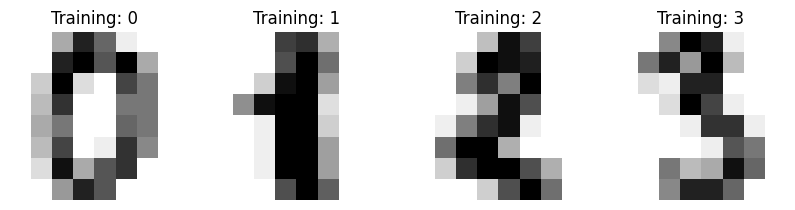

In [29]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


In [41]:
import random
import numpy as np
import math

class Neuronio:
    def __init__(self, n_entradas, taxa_aprendizado=0.1, bias=1):
        self.bias = bias
        self.taxa_aprendizado = taxa_aprendizado
        #Inicializar com pesos aleatórios
        self.pesos = [random.uniform(-1, 1) for _ in range(n_entradas + 1)]
        # Inicializar com 0
        #self.pesos = [0,0,0]
        self.ult_entrada = None

    def ativacao(self, x):
        #print(np.round((x%10)).astype(int))
        #return np.round((x%10)).astype(int)
        #print(x)
        return 1 / (1 + math.exp(-x))

    def somatorio(self, entradas):
        return sum(p * x for p, x in zip(self.pesos, [self.bias] + entradas))

    def saida(self, entradas):
        self.ult_entrada = entradas
        return self.ativacao(self.somatorio(entradas))

    def treinar(self, dados, epocas=10):
        for epoca in range(epocas):
            erro_total = 0
            for entradas, esperado in dados:
                saida = self.saida(entradas)
                print(f"Saída {saida} - Saída Esperada {esperado}")
                erro = esperado - saida
                if erro != 0:
                    #Atualiza pesos
                    #print(f"Época {epoca} - Entrada [{entradas}] Pesos Antigos  {self.pesos}")
                    for i in range(len(self.pesos)):
                        xi = self.bias if i == 0 else entradas[i - 1]
                        self.pesos[i] = self.pesos[i] + self.taxa_aprendizado * erro * xi
                    #print(f"Época {epoca} - Entrada [{entradas}] Pesos Atualizados  {self.pesos}")
                erro_total += abs(erro)
            if erro_total == 0:
                break
            print(f"[] Época {epoca+1}, erro total: {erro_total}")


    def __call__(self, entradas):
        return self.saida(entradas)

    def __repr__(self):
        return f"Neuronio(pesos={self.pesos})"

In [ ]:
digits = datasets.load_digits()

for image, label in zip(digits.images, digits.target):
    image = image / 16.0
    entrada = image.flatten()
    entradas.append((entrada, label))

print(entradas)
#n1 = Neuronio(64, taxa_aprendizado=0.5, bias= 1.5)
#n1.treinar(entradas, 10)



In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np



In [ ]:
# 1. Carrega o dataset
digits = load_digits()
X = digits.data  # Imagens 8x8 (64 pixels)
y = digits.target  # Labels (0 a 9)

# 2. Normaliza os pixels para [0, 1]
X = X / 16.0  # Valores originais vão de 0 a 16

# 3. Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Cria o modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),  # Camada oculta opcional
    Dense(10, activation='softmax')  # 10 neurônios (1 por classe)
])

# 5. Compila o modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Para labels inteiros
    metrics=['accuracy']
)

# 6. Treina o modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 7. Avalia no teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {test_acc:.4f}")

# 8. Predição exemplo
sample = X_test[0:1]
predicted_prob = model.predict(sample)
predicted_class = np.argmax(predicted_prob)

print(f"\nExemplo de predição:")
print(f"Label real: {y_test[0]}")
print(f"Classe predita: {predicted_class}")
print(f"Probabilidades: {predicted_prob}")

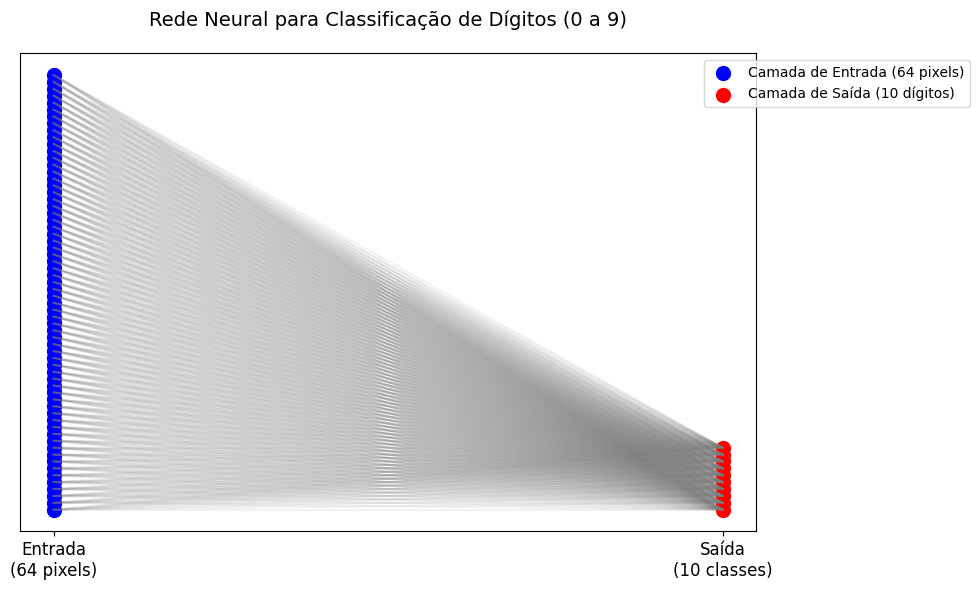

In [33]:
from matplotlib import pyplot as plt
import numpy as np

# Configuração da figura
plt.figure(figsize=(10, 6))

# Camadas
input_layer = np.array([f'Pixel {i+1}' for i in range(64)])  # 64 pixels (8x8)
hidden_layer = np.array([f'Neurônio {i+1}' for i in range(64)])  # Opcional (não usada no seu último exemplo)
output_layer = np.array([f'Dígito {i}' for i in range(10)])  # 10 neurônios de saída (0 a 9)

# Plotagem
plt.scatter(np.zeros(len(input_layer)), np.arange(len(input_layer)), color='blue', s=100, label='Camada de Entrada (64 pixels)')
# plt.scatter(np.ones(len(hidden_layer)) * 2, np.arange(len(hidden_layer)), color='orange', s=100, label='Camada Oculta (64 neurônios)')  # Remova se não usar camada oculta
plt.scatter(np.ones(len(output_layer)) * 2, np.arange(len(output_layer)), color='red', s=100, label='Camada de Saída (10 dígitos)')

# Conexões (simplificado)
for i in range(len(input_layer)):
    for j in range(len(output_layer)):
        plt.plot([0, 2], [i, j], 'gray', alpha=0.1)  # Conexões entrada-saída

# Ajustes visuais
plt.yticks([])
plt.xticks([0, 2], ['Entrada\n(64 pixels)', 'Saída\n(10 classes)'], fontsize=12)
plt.title('Rede Neural para Classificação de Dígitos (0 a 9)', fontsize=14, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(False)
plt.tight_layout()
plt.show()